In [93]:
import pandas as pd
import numpy as np
import scipy
import datetime

import plotly.graph_objects as go
import plotly.express as px
import chart_studio.plotly as py
from chart_studio.plotly import plot
import cufflinks as cf
cf.set_config_file(offline=True)
from plotly.subplots import make_subplots

import ipywidgets as widgets
from ipywidgets import interact, interact_manual, interactive, fixed
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

plt.rcParams.update({'figure.max_open_warning': 0})
pd.set_option('mode.chained_assignment', None)
pd.options.display.max_rows = 200
pd.set_option("display.max_columns", 150)

In [94]:
df = pd.read_csv('data/products.csv')
descriptors = df.columns[:8]
production_df = df
production_df['product'] = production_df[descriptors[2:]].agg('-'.join, axis=1)
production_df = production_df.sort_values(['Product Family', 'EBIT'],
                                          ascending=False)

In [95]:
def make_ebit_plot(production_df, select=None, sort='Worst', descriptors=None):
    families = production_df['Product Family'].unique()
    colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3',\
              '#FF6692', '#B6E880', '#FF97FF', '#FECB52']
    colors_cycle = cycle(colors)
    grey = ['#7f7f7f']
    color_dic = {'{}'.format(i): '{}'.format(j) for i, j  in zip(families,
                                                                 colors)}
    grey_dic =  {'{}'.format(i): '{}'.format('#7f7f7f') for i in families}
    fig = go.Figure()


    if select == None:
        for data in px.scatter(
                production_df,
                x='product',
                y='EBIT',
                color='Product Family',
                color_discrete_map=color_dic,
                opacity=1).data:
            fig.add_trace(
                data
            )

    elif select != None:
        color_dic = {'{}'.format(i): '{}'.format(j) for i, j  in zip(select,
                                                                     colors)}
        for data in px.scatter(
                production_df,
                x='product',
                y='EBIT',
                color='Product Family',

                color_discrete_map=color_dic,
                opacity=0.09).data:
            fig.add_trace(
                data
            )

        if sort == 'Best':
            local_df = stat_df.sort_values('score', ascending=False)
        elif sort == 'Worst':
            local_df = stat_df


        new_df = pd.DataFrame()
        if descriptors != None:
            local_df = local_df.loc[local_df['descriptor'].isin(descriptors)]
        for index in select:
            x = production_df.loc[(production_df[local_df.iloc[index]\
                ['descriptor']] == local_df.iloc[index]['group'])]
            x['color'] = next(colors_cycle) # for line shapes
            new_df = pd.concat([new_df, x])
            new_df = new_df.reset_index(drop=True)
        for data in px.scatter(
                new_df,
                x='product',
                y='EBIT',
                color='Product Family',

                color_discrete_map=color_dic,
                opacity=1).data:
            fig.add_trace(
                data
            )
        shapes=[]

        for index, i in enumerate(new_df['product']):
            shapes.append({'type': 'line',
                           'xref': 'x',
                           'yref': 'y',
                           'x0': i,
                           'y0': -3e5,
                           'x1': i,
                           'y1': 3e5,
                           'line':dict(
                               dash="dot",
                               color=new_df['color'][index],)})
        fig.update_layout(shapes=shapes)
    fig.update_layout({
            "plot_bgcolor": "#F9F9F9",
            "paper_bgcolor": "#F9F9F9",
            "title": 'EBIT by Product Family',
            "height": 500,
            "font":dict(
                size=8,
            ),
            })
    return fig

In [96]:
from itertools import cycle
fig = make_ebit_plot(production_df)

load it

In [97]:
oee = pd.read_csv('data/oee.csv', index_col=0)
oee['From Date/Time'] = pd.to_datetime(oee["From Date/Time"])
oee['To Date/Time'] = pd.to_datetime(oee["To Date/Time"])
oee["Run Time"] = pd.to_timedelta(oee["Run Time"])

df = pd.read_csv('data/products.csv')
descriptors = df.columns[:8]
stat_df = pd.read_csv('data/category_stats.csv')
old_products = df[descriptors].sum(axis=1).unique().shape[0]

production_df = df
production_df['Product'] = production_df[descriptors[2:]].agg('-'.join, axis=1)
production_df = production_df.sort_values(['Product Family', 'EBIT'], ascending=False)

Performance

In [98]:
px.box(oee, x='Line', y='Yield', color='Line')

Text(0.5, 1.0, 'Down Days, 2019')

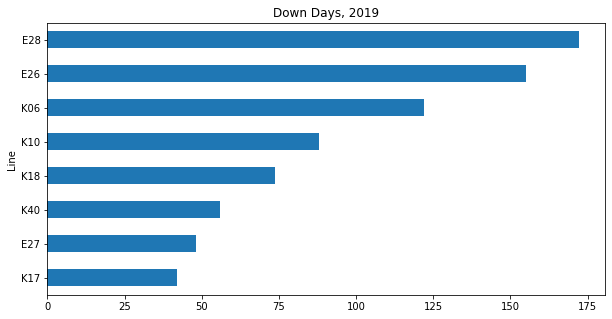

In [99]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
(oee.groupby('Line')['Uptime'].sum().sort_values()/24).plot.barh(ax=ax)
ax.set_title('Down Days, 2019')
# fig.savefig('assets/downtime.png')

In [100]:
def boxplot_sorted(df, by, column, rot=0, ax=None, vert=None):
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.median().sort_values()
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[meds.index].boxplot(rot=rot, return_type="axes", vert=False, ax=ax)

Text(0.5, 1.0, 'Yield')

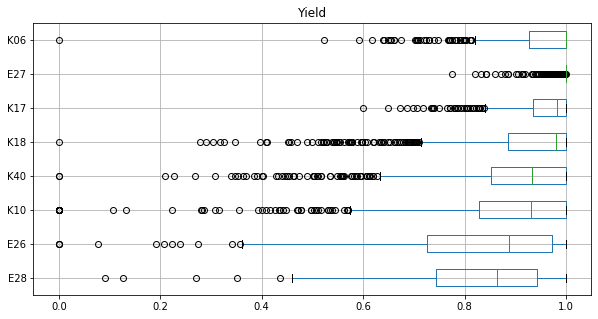

In [101]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
boxplot_sorted(oee, by='Line', column='Yield', vert=False, ax=ax)
ax.set_title('Yield')
# fig.savefig('assets/yield.png')

Text(0.5, 1.0, 'Rate')

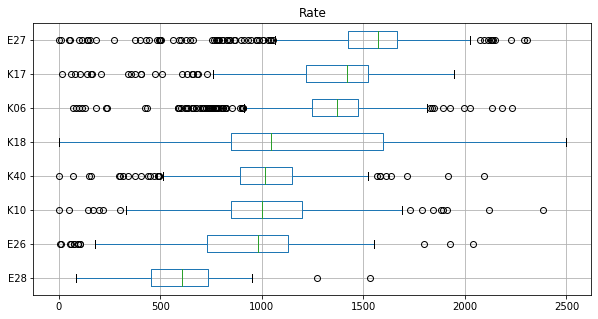

In [102]:
fig, ax = plt.subplots(1,1,figsize=(10,5))
boxplot_sorted(oee, by='Line', column='Rate', vert=False, ax=ax)
ax.set_title('Rate')
# fig.savefig('assets/rate.png')

In [103]:
list(oee.groupby('Line')['Yield'].describe().sort_values('50%').index.values)

['E28', 'E26', 'K10', 'K40', 'K18', 'K17', 'E27', 'K06']

In [104]:
oee.groupby('Line')['Rate'].describe().sort_values('50%')

count         mean         std        min          25%          50%  \
Line                                                                         
E28     83.0   584.169512  248.075385  84.611653   456.122481   606.885117   
E26    284.0   926.123661  320.610333   3.789585   732.014929   981.659832   
K10    693.0  1027.941407  285.340577   0.000000   845.443880   999.927276   
K40   1311.0  1017.659426  208.817797   0.000000   891.925149  1015.681626   
K18    982.0  1205.641019  474.541590   0.000000   847.902917  1045.100882   
K06    679.0  1323.245275  277.587679  72.161147  1248.302877  1370.251734   
K17    471.0  1333.493533  295.124522  15.621593  1215.463977  1418.570773   
E27    719.0  1503.617463  322.186252   0.000000  1421.689631  1570.315464   

              75%          max  
Line                            
E28    735.254663  1533.942126  
E26   1127.601836  2041.318501  
K10   1196.884273  2383.379501  
K40   1150.387039  2094.944425  
K18   1597.446650  2497.973708  
K06   1473.808251  2232.392679  
K17   1520.905615  1944.000000  
E27   1665.135966  2303.470926

In [105]:
oee.groupby('Line')['Uptime'].describe().sort_values('50%')

count       mean         std  min  25%  50%        75%         max
Line                                                                     
E26    283.0  13.149769   54.579306  0.0  0.0  0.0   0.000000  533.100833
E27    719.0   1.604628   13.600585  0.0  0.0  0.0   0.000000  220.330278
E28     83.0  49.784799  112.130893  0.0  0.0  0.0  16.768333  472.234722
K06    679.0   4.315243   30.227882  0.0  0.0  0.0   0.000000  409.198611
K10    693.0   3.049367   18.375441  0.0  0.0  0.0   0.000000  220.681944
K17    471.0   2.139916   20.424982  0.0  0.0  0.0   0.000000  369.920556
K18    982.0   1.804053   16.643351  0.0  0.0  0.0   0.000000  242.289722
K40   1311.0   1.022276   12.829277  0.0  0.0  0.0   0.000000  255.740000

In [106]:
px.violin(oee, x='Line', y='Uptime', color='Line')

most of the runs have 0 downtime (grand median is 0 for total dataset, median testing simply returns ratios where scores were greater than 0)

In [107]:
def my_median_test(df, metric='Yield', stat_cut_off=1e-2):
    """
    Parameters
    ----------
    metric: str, default Yield
        Yield, Rate, or Uptime (or whatever you have a col name for
        I guess jajajaj)
    stat_cut_off: float, default 1e-2
        p-test cutoff (<0.01 chance of null hypothesis)
        
    Returns
    -------
    stat_df: DataFrame
        Moods Median Test Results for Metric
    """
    # median testing
    moods = []
    descriptor = 'From Date/Time'
    for days in df[descriptor].dt.day.unique():
        stat, p, m, table = scipy.stats.median_test(df.loc[df['From Date/Time'].dt.day == days][metric],
                               df.loc[~(df['From Date/Time'].dt.day == days)][metric], nan_policy='omit')
        moods.append([descriptor, days, stat,p,m,table])

#     descriptor = 'Startdate'
#     for days in df[descriptor].dt.hour.unique():
#         stat, p, m, table = scipy.stats.median_test(df.loc[df['Startdate'].dt.hour == days][metric],
#                                df.loc[~(df['Startdate'].dt.hour == days)][metric], nan_policy='omit')
#         moods.append(["{} hour".format(descriptor), days, stat,p,m,table])

    descriptors = ['Product group', 'Line']
    for descriptor in descriptors:
        for item in df[descriptor].unique():
            try:
                stat, p, m, table = scipy.stats.median_test(df.loc[df[descriptor] == item][metric],
                                       df.loc[~(df[descriptor] == item)][metric], nan_policy='omit')
                moods.append([descriptor, item, stat,p,m,table])
            except:
                pass
    stat_df = pd.DataFrame(moods)
    stat_df.columns = ['descriptor', 'group', 'stat', 'p', 'm', 'table']
    stat_df = stat_df.sort_values(by='stat', ascending=False).reset_index(drop=True)
    stat_df = stat_df.loc[stat_df['p'] < 1e-2].drop_duplicates('stat').reset_index(drop=True)
    scores = []
    for index in range(stat_df.shape[0]):
        x = df.loc[(df[stat_df.iloc[index]['descriptor']] == \
                    stat_df.iloc[index]['group'])][metric]
        y = df.loc[(df[stat_df.iloc[index]['descriptor']] == \
                    stat_df.iloc[index]['group'])][metric].median()
        y = df.loc[(df[stat_df.iloc[index]['descriptor']] == 
            stat_df.iloc[index]['group'])][stat_df.iloc[index]['descriptor']]
        if metric == 'Uptime':
            scores.append(stat_df['table'][index][1][0] / stat_df['table'][index][0][0])
        else:
            scores.append(stat_df['table'][index][0][0] / stat_df['table'][index][1][0])
#         scores.append(stat_df['table'][index][0][0] / stat_df['table'][index][1][0])
    stat_df['score'] = scores
    stat_df = stat_df.sort_values('score', ascending=True)
    stat_df = stat_df.reset_index(drop=True)
    return stat_df

In [108]:
yield_stat = my_median_test(oee, 'Yield')
rate_stat = my_median_test(oee, 'Rate')
uptime_stat = my_median_test(oee, 'Uptime')

In [109]:
pd.DataFrame(oee.groupby('Line')['Product group'].unique())

Product group
Line                                                   
E26               [Shrink Sleeve, Dec. Surfaces/others]
E27                                     [Shrink Sleeve]
E28    [PSL, Shrink Sleeve, Roll Sleeve, PH Mono Films]
K06                                     [Shrink Sleeve]
K10   [Cards Core, Cooling Tower, Construction, Dec....
K17                                              [Tape]
K18   [Cards Core, Cooling Tower, Other Technical, C...
K40   [Cards Core, Shrink Sleeve, Tape, Dec. Surface...

In [110]:
uptime_stat['metric'] = 'Uptime'
rate_stat['metric'] = 'Rate'
yield_stat['metric'] = 'Yield'

In [111]:
stats = pd.concat([uptime_stat, rate_stat, yield_stat])

In [112]:
stats.loc[stats['score'] < 1, 'score'] = -1/stats.loc[stats['score'] < 1, 'score']

In [113]:
stats = stats.reset_index(drop=True)

In [114]:
# stats.to_csv('../../../dashboards/line_consolidation/data/scores.csv')

In [115]:
px.bar(stats, x='group', y='score', color='metric', barmode='group')
# px.bar(stats.loc[stats['score'] > 1], x='group', y='score', color='metric', barmode='group')

Scores reflect whether a group (line or product family) is improving or degrading the indicated metric (uptime, rate, yield). While groups were determined to be statistically impactful (null hypothesis < 0.01) it does not guarantee decoupling. For instance, PSL has a very negative impact on rate and yield. However, the only line that runs PSL is E28, which is rated similarly. 

In [116]:
fig = go.Figure()
descriptor = 'Product group'
select = oee[descriptor].unique()
for index in select:
    x = oee.loc[oee[descriptor] == index][descriptor]
    y = oee.loc[oee[descriptor] == index]['Yield']
    
    fig.add_trace(go.Violin(x=x,
                            y=y,
                            name="{}, N={}".format(index, y.shape[0]),
                            box_visible=True,
                            meanline_visible=True))
fig.update_layout({
        "plot_bgcolor": "#F9F9F9",
        "paper_bgcolor": "#F9F9F9",
        "title": 'EBIT by Product Descriptor',
        })

fig.show()

In [117]:
fig.show()

# Opportunity

In [118]:
oee['From Date/Time'] = pd.to_datetime(oee["From Date/Time"])
oee['To Date/Time'] = pd.to_datetime(oee["To Date/Time"])
oee["Run Time"] = pd.to_timedelta(oee["Run Time"])

In [119]:
quantiles = np.arange(50,101,1)
quantiles = quantiles*.01
quantiles = np.round(quantiles, decimals=2)
asset_metrics = ['Yield', 'Rate', 'Uptime']
groupby = ['Line', 'Product group']
res = oee.groupby(groupby)[asset_metrics].quantile(quantiles)#.unstack(level=1)

In [120]:
prod_good = oee.loc[oee["From Date/Time"].dt.year == 2019].groupby(groupby)['Quantity Good'].sum()
prod = oee.loc[oee["From Date/Time"].dt.year == 2019].groupby(groupby)['Net Quantity Produced'].sum()
time = oee.loc[oee["From Date/Time"].dt.year == 2019].groupby(groupby)['Run Time'].sum()
annual_operating = pd.merge(prod, time, left_index=True, right_index=True)
annual_operating = pd.merge(annual_operating, prod_good, left_index=True, right_index=True)
annual_operating['Run Time'] = annual_operating['Run Time'].dt.total_seconds()/60/60

In [121]:
def opportunity_conversion(x, annual_df, metric='Rate', basis='Net Quantity Produced', line='E26'):
    return x * annual_operating.loc[line][basis] \
    / res.reorder_levels([2, 0, 1]).loc[0.5, line][metric]

In [122]:
metrics = ['Rate', 'Yield', 'Uptime']
bases=['Net Quantity Produced', 'Run Time']
lines = oee.Line.unique()

opportunity = pd.DataFrame()

for line in lines:
    for basis in bases:
        metric = metrics[0]
        temp1 = opportunity_conversion(res.loc[line][metric], annual_operating,
                                      metric=metric, basis=basis, line=line)
        temp1 = pd.DataFrame(temp1)
        temp1.columns = ['{}'.format(metric)]
        temp1 = pd.concat([temp1], keys=['{}'.format(line)], names=['Line'])
        temp1 = pd.concat([temp1], keys=['{}'.format(basis)], names=['Basis'])
        
        metric = metrics[1]
        temp2 = opportunity_conversion(res.loc[line][metric], annual_operating,
                                      metric=metric, basis=basis, line=line)
        temp2 = pd.DataFrame(temp2)
        temp2.columns = ['{}'.format(metric)]
        temp2 = pd.concat([temp2], keys=['{}'.format(line)], names=['Line'])
        temp2 = pd.concat([temp2], keys=['{}'.format(basis)], names=['Basis'])
        
        metric = metrics[2]
        temp3 = opportunity_conversion(res.loc[line][metric], annual_operating,
                                      metric=metric, basis=basis, line=line)
        temp3 = pd.DataFrame(temp3)
        temp3.columns = ['{}'.format(metric)]
        temp3 = pd.concat([temp3], keys=['{}'.format(line)], names=['Line'])
        temp3 = pd.concat([temp3], keys=['{}'.format(basis)], names=['Basis'])
        
        df = pd.merge(temp1, temp2, left_index=True, right_index=True)
        df = pd.merge(df, temp3, left_index=True, right_index=True)
        

        opportunity = pd.concat([opportunity, df], sort=False)
        

<ipython-input-121-f7956b2aedd3>:3: PerformanceWarning:

indexing past lexsort depth may impact performance.



In [123]:
metrics = ['Rate', 'Yield', 'Uptime']
bases=['Net Quantity Produced', 'Run Time']
lines = oee.Line.unique()
opportunity = pd.DataFrame()

for line in lines:
    for basis in bases:
        index = 0
        for metric in metrics:
            temp = opportunity_conversion(res.loc[line][metric], annual_operating,
                                          metric=metric, basis=basis, line=line)
            temp = pd.DataFrame(temp)
            temp.columns = ['{}'.format(metric)]
            temp = pd.concat([temp], keys=['{}'.format(line)], names=['Line'])
            temp = pd.concat([temp], keys=['{}'.format(basis)], names=['Basis'])
            opportunity = pd.concat([opportunity, temp], sort=False)

<ipython-input-121-f7956b2aedd3>:3: PerformanceWarning:

indexing past lexsort depth may impact performance.



In [124]:
opportunity = opportunity.replace([np.inf, -np.inf], np.nan)

In [125]:
# opportunity.to_csv('../../../dashboards/line_consolidation/data/days.csv')

In [126]:
# opportunity = pd.read_csv('data/days.csv', index_col=[0,1,2,3])

In [127]:
opportunity.columns

Index(['Rate', 'Yield', 'Uptime'], dtype='object')

In [128]:
@interact
def show_long_downtimes(column=['Net Quantity Produced', 'Run Time'], quantile=quantiles, groupby=['Line', 'Product Family']):
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    df = (opportunity.reorder_levels([0,3,1,2]).loc[column, quantile]\
        .groupby([groupby]).sum(axis=1) - \
    opportunity.reorder_levels([0,3,1,2]).loc[column, 0.5]\
        .groupby([groupby]).sum(axis=1))#.plot.barh(stacked=True, ax=ax)

    dff = annual_operating.groupby(groupby).sum(axis=1)[column]\
        .sort_values()
    dff.columns = [column]
    data = pd.merge(dff, df, left_index=True, right_index=True)
    cols = data.columns
    data["Total"] = data.sum(axis=1)
    data.sort_values(by='Total')[cols].plot.barh(stacked=True, ax=ax)

interactive(children=(Dropdown(description='column', options=('Net Quantity Produced', 'Run Time'), value='Net…

In [129]:
# opp.to_csv('../../../dashboards/line_consolidation/data/opportunity.csv')

In [130]:
# annual_operating.to_csv('../../../dashboards/line_consolidation/data/annual.csv')

In [132]:

opp = pd.read_csv('data/opportunity.csv', index_col=[0,1,2,3])
annual_operating = pd.read_csv('data/annual.csv', index_col=[0,1])
quantiles = np.arange(50,96,1)
quantiles = quantiles*.01
quantiles = np.round(quantiles, decimals=2)
dataset = opp.sort_index()
lines = opp.index.get_level_values(1).unique()

# make figure
fig_dict = {
    "data": [],
    "layout": {},
    "frames": []
}
duration_bench = 300

# fill in most of layout
fig_dict["layout"]["barmode"] = "stack"
fig_dict["layout"]["xaxis"] = {"title": "Production"}
fig_dict["layout"]["yaxis"] = {"title": "Line"}
fig_dict["layout"]["hovermode"] = "closest"
fig_dict["layout"]["sliders"] = {
    "args": [
        "transition", {
            "duration": duration_bench,
            "easing": "cubic-in-out"
        }
    ],
    "initialValue": str(quantiles[0]),
    "plotlycommand": "animate",
    "values": quantiles,
    "visible": True
}

fig_dict["layout"]["updatemenus"] = [
    {
        "buttons": [
            {
                "args": [None, {"frame": {"duration": duration_bench + 100, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": duration_bench - 100,
                                                                    "easing": "quadratic-in-out"}}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }
]

sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "quantile:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": duration_bench - 100, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

# make data
column='Net Quantity Produced'
quantile = 0.9
groupby = 'Line'
df = (opp.reorder_levels([0,3,1,2]).sort_index().loc[column, quantile]\
        .groupby([groupby]).sum(axis=1) - \
opp.reorder_levels([0,3,1,2]).sort_index().loc[column, 0.5]\
    .groupby([groupby]).sum(axis=1))

dff = annual_operating.groupby(groupby).sum(axis=1)[column]\
    .sort_values()
dff.columns = [column]
data = pd.merge(dff, df, left_index=True, right_index=True)
cols = data.columns
data["Total"] = data.sum(axis=1)
data = data.sort_values(by='Total')

bar_fig = []
for col in cols:
    data_dict = {
        "x":data[col],
        "y":[str(i) for i in data.index],
        "name": col,
        "orientation": "h",
        
    }
    fig_dict["data"].append(go.Bar(data_dict))

# make frames
for quantile in quantiles:
    frame = {"data": [], "name": str(quantile)}
    df = (opp.reorder_levels([0,3,1,2]).sort_index().loc[column, quantile]\
        .groupby([groupby]).sum(axis=1) - \
    opp.reorder_levels([0,3,1,2]).sort_index().loc[column, 0.5]\
        .groupby([groupby]).sum(axis=1))

    dff = annual_operating.groupby(groupby).sum(axis=1)[column]\
        .sort_values()
    dff.columns = [column]
    data = pd.merge(dff, df, left_index=True, right_index=True)
    cols = data.columns
    data["Total"] = data.sum(axis=1)
    data = data.sort_values(by='Total')

    bar_fig = []
    for col in cols:
        data_dict = {
            "x":data[col],
            "y":[str(i) for i in data.index],
            "name": col,
            "orientation": "h",
            
        }
        frame["data"].append(go.Bar(data_dict))

    fig_dict["frames"].append(frame)
    slider_step = {"args": [
        [quantile],
        {"frame": {"duration": duration_bench - 100, "redraw": False},
         "mode": "immediate",
         "transition": {"duration": duration_bench - 100}}
    ],
        "label": quantile,
        "method": "animate"}
    sliders_dict["steps"].append(slider_step)


fig_dict["layout"]["sliders"] = [sliders_dict]

fig = go.Figure(fig_dict)

fig.show()


# Opportunity - Days

In [133]:
oee['From Date/Time'] = pd.to_datetime(oee["From Date/Time"])
oee['To Date/Time'] = pd.to_datetime(oee["To Date/Time"])
oee["Run Time"] = pd.to_timedelta(oee["Run Time"])

In [134]:
quantiles = np.arange(50,101,1)
quantiles = quantiles*.01
quantiles = np.round(quantiles, decimals=2)
asset_metrics = ['Yield', 'Rate', 'Uptime']
groupby = ['Line', 'Product group']
res = oee.groupby(groupby)[asset_metrics].quantile(quantiles)#.unstack(level=1)

In [135]:
prod = oee.loc[oee["From Date/Time"].dt.year == 2019].groupby(groupby)['Net Quantity Produced'].sum()
time = oee.loc[oee["From Date/Time"].dt.year == 2019].groupby(groupby)['Run Time'].sum()
annual_operating = pd.merge(prod, time, left_index=True, right_index=True)
annual_operating['Run Time'] = annual_operating['Run Time'].dt.total_seconds()/60/60

In [136]:
def opportunity_conversion_days(x, annual_operating, metric='Rate', basis='Net Quantity Produced', line='E26'):
    target = x.reorder_levels([1,0]).sort_index()#[0.9]
    median = x.reorder_levels([1,0]).sort_index()[0.5]
    if metric == 'Rate':
        basis = 'Net Quantity Produced'
        total_kg = annual_operating.loc[line][basis]
        additional_days_production = (total_kg / median / 24) - (total_kg / target / 24)
    if metric == 'Yield':
        basis = 'Run Time'
        total_kg = annual_operating.loc[line][basis]
        additional_days_production = (total_kg / 24) - (total_kg * median / target / 24)
    if metric == 'Uptime':
        additional_days_production = (target - median) /24
    return additional_days_production

In [137]:
metrics = ['Rate', 'Yield', 'Uptime']
bases=['Additional Days']
lines = oee.Line.unique()

opportunity = pd.DataFrame()

for line in lines:
    for basis in bases:
        metric = metrics[0]
        temp1 = opportunity_conversion_days(res.loc[line][metric], annual_operating,
                                      metric=metric, basis=basis, line=line)
        temp1 = pd.DataFrame(temp1)
        temp1.columns = ['{}'.format(metric)]
        temp1 = pd.concat([temp1], keys=['{}'.format(line)], names=['Line'])
        temp1 = pd.concat([temp1], keys=['{}'.format(basis)], names=['Basis'])
        
        metric = metrics[1]
        temp2 = opportunity_conversion_days(res.loc[line][metric], annual_operating,
                                      metric=metric, basis=basis, line=line)
        temp2 = pd.DataFrame(temp2)
        temp2.columns = ['{}'.format(metric)]
        temp2 = pd.concat([temp2], keys=['{}'.format(line)], names=['Line'])
        temp2 = pd.concat([temp2], keys=['{}'.format(basis)], names=['Basis'])
        
        metric = metrics[2]
        temp3 = opportunity_conversion_days(res.loc[line][metric], annual_operating,
                                      metric=metric, basis=basis, line=line)
        temp3 = pd.DataFrame(temp3)
        temp3.columns = ['{}'.format(metric)]
        temp3 = pd.concat([temp3], keys=['{}'.format(line)], names=['Line'])
        temp3 = pd.concat([temp3], keys=['{}'.format(basis)], names=['Basis'])
        
        df = pd.merge(temp1, temp2, left_index=True, right_index=True)
        df = pd.merge(df, temp3, left_index=True, right_index=True)
        

        opportunity = pd.concat([opportunity, df], sort=False)
        

In [138]:
metrics = ['Rate', 'Yield', 'Uptime']
bases=['Net Quantity Produced', 'Run Time']

lines = oee.Line.unique()
opportunity = pd.DataFrame()

for line in lines:
    for metric in metrics:
        temp = opportunity_conversion_days(res.loc[line][metric], annual_operating,
                                      metric=metric, basis=basis, line=line)
        temp = pd.DataFrame(temp)
        temp.columns = ['{}'.format(metric)]
        temp = pd.concat([temp], keys=['{}'.format(line)], names=['Line'])
        temp = pd.concat([temp], keys=['{}'.format(basis)], names=['Basis'])
        opportunity = pd.concat([opportunity, temp], sort=False)

In [139]:
opportunity = opportunity.replace([np.inf, -np.inf], np.nan)

In [140]:
def calculate_opportunity(quantile=0.9):
    data = opportunity.reorder_levels([0,2,1,3]).sort_index().loc['Additional Days', quantile].groupby('Line').sum()
    data['Total'] = data.sum(axis=1)
    return "{:.1f}".format(data.sum()[0]), \
            "{:.1f}".format(data.sum()[1]), \
            "{:.1f}".format(data.sum()[2]), \
            "{:.1f}".format(data.sum()[3]), 

In [141]:
def make_days_plot(quantile=0.9):
    data = opportunity.reorder_levels([0,2,1,3]).sort_index().loc['Additional Days', quantile].groupby('Line').sum()
    cols = ['Rate', 'Yield', 'Uptime']
    data['Total'] = data.sum(axis=1)
    data = data.sort_values(by='Total')
    bar_fig = []
    for col in cols:
        bar_fig.append(
        go.Bar(
        name=col,
        orientation="h",
        y=[str(i) for i in data.index],
        x=data[col],
        customdata=[col]
        )
    )

    figure = go.Figure(
        data=bar_fig,
        layout=dict(
            barmode="stack",
            yaxis_type="category",
            yaxis=dict(title="Line"),
            xaxis=dict(title="Days"),
            title="Annualized Opportunity",
            plot_bgcolor="#F9F9F9",
            paper_bgcolor="#F9F9F9"
        )
    )
    figure.update_layout({
                "plot_bgcolor": "#F9F9F9",
                "paper_bgcolor": "#F9F9F9",
    })
    return figure

In [142]:
fig = make_days_plot(quantile=0.6)
fig.show()

Opportunity (days of additional production) is computed from distributions around uptime, yield, and rate with respect to each of the lines and their product families. Some lines perform very well (E27 and K06) and already perform near their upper quantile ranges. Other lines (K10, E28) have a lot of hidden capacity due to wide variability in their operation. The additional days of production should be interpreted as untapped potential. For instance, If all lines were to perform in their 0.82 quantile bracket, the plant would gain the equivalent of running an additional line for an entire calendar year.  

In [143]:
clickData ={
  "points": [
    {
      "curveNumber": 1,
      "pointNumber": 7,
      "pointIndex": 7,
      "x": 18.756583133439456,
      "y": "K40",
      "label": "K40",
      "value": 18.756583133439456
    }
  ]
}

In [144]:
def pareto_product_family(quantile = 0.9, clickData=None):
    if clickData != None:
        line = clickData["points"][0]["y"]
    else:
        line = 'K40'
    data = opportunity.reorder_levels([0,2,1,3]).loc['Additional Days', quantile, line]
    cols = data.columns
    bar_fig = []
    for col in cols:
        bar_fig.append(
        go.Bar(
        name=col,
        orientation="h",
        y=[str(i) for i in data.index],
        x=data[col],
        customdata=[col],
        )
        )

    figure = go.Figure(
        data=bar_fig,
        layout=dict(
            barmode="group",
            yaxis_type="category",
            yaxis=dict(title="Line"),
            xaxis=dict(title="Days"),
            title=line,
            plot_bgcolor="#F9F9F9",
            paper_bgcolor="#F9F9F9"
        )
    )
    figure.update_layout({
                "plot_bgcolor": "#F9F9F9",
                "paper_bgcolor": "#F9F9F9",
    })
    return figure

In [145]:
fig = pareto_product_family()
fig.show()

<ipython-input-144-f857d61b1022>:6: PerformanceWarning:

indexing past lexsort depth may impact performance.



In [146]:
def pie_line(clickData=None):
    if clickData != None:
        line = clickData["points"][0]["y"]
    else:
        line = 'K40'
    data = annual_operating.loc[line]
    fig = px.pie(data, values='Net Quantity Produced', names=data.index, title='Production distribution 2019 (kg)')
    return fig

In [147]:
fig = pie_line()
fig.show()

In [148]:
opp = pd.read_csv('data/opportunity.csv', index_col=[0,1,2,3])
annual_operating = pd.read_csv('data/annual.csv', index_col=[0,1])
quantiles = np.arange(50,96,1)
quantiles = quantiles*.01
quantiles = np.round(quantiles, decimals=2)
dataset = opp.sort_index()
lines = opp.index.get_level_values(1).unique()

# make figure
fig_dict = {
    "data": [],
    "layout": {},
    "frames": []
}
duration_bench = 300

# fill in most of layout
fig_dict["layout"]["barmode"] = "stack"
fig_dict["layout"]["xaxis"] = {"title": "Days Saved (2019)"}
fig_dict["layout"]["yaxis"] = {"title": "Line"}
fig_dict["layout"]["hovermode"] = "closest"
fig_dict["layout"]["sliders"] = {
    "args": [
        "transition", {
            "duration": duration_bench,
            "easing": "cubic-in-out"
        }
    ],
    "initialValue": str(quantiles[0]),
    "plotlycommand": "animate",
    "values": quantiles,
    "visible": True
}

fig_dict["layout"]["updatemenus"] = [
    {
        "buttons": [
            {
                "args": [None, {"frame": {"duration": duration_bench + 100, "redraw": False},
                                "fromcurrent": True, "transition": {"duration": duration_bench - 100,
                                                                    "easing": "quadratic-in-out"}}],
                "label": "Play",
                "method": "animate"
            },
            {
                "args": [[None], {"frame": {"duration": 0, "redraw": False},
                                  "mode": "immediate",
                                  "transition": {"duration": 0}}],
                "label": "Pause",
                "method": "animate"
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }
]

sliders_dict = {
    "active": 0,
    "yanchor": "top",
    "xanchor": "left",
    "currentvalue": {
        "font": {"size": 20},
        "prefix": "quantile:",
        "visible": True,
        "xanchor": "right"
    },
    "transition": {"duration": duration_bench - 100, "easing": "cubic-in-out"},
    "pad": {"b": 10, "t": 50},
    "len": 0.9,
    "x": 0.1,
    "y": 0,
    "steps": []
}

# make data

data = opportunity.reorder_levels([0,2,1,3]).sort_index().loc['Additional Days', 0.95].groupby('Line').sum()
cols = ['Rate', 'Yield', 'Uptime']
data['Total'] = data.sum(axis=1)
data = data.sort_values(by='Total')
bar_fig = []
for col in cols:
    data_dict = {
        "x":data[col],
        "y":[str(i) for i in data.index],
        "name": col,
        "orientation": "h",
        
    }
    fig_dict["data"].append(go.Bar(data_dict))

# make frames
for quantile in quantiles:
    frame = {"data": [], "name": str(quantile)}
    
    data = opportunity.reorder_levels([0,2,1,3]).sort_index().loc['Additional Days', quantile].groupby('Line').sum()
    data2 = opportunity.reorder_levels([0,2,1,3]).sort_index().loc['Additional Days', 0.95].groupby('Line').sum()
    
    data['Total'] = data2.sum(axis=1)
    cols = ['Rate', 'Yield', 'Uptime']
    
    data = data.sort_values(by='Total')

    bar_fig = []
    for col in cols:
        data_dict = {
            "x":data[col],
            "y":[str(i) for i in data.index],
            "name": col,
            "orientation": "h",
            
        }
        frame["data"].append(go.Bar(data_dict))

    fig_dict["frames"].append(frame)
    slider_step = {"args": [
        [quantile],
        {"frame": {"duration": duration_bench - 100, "redraw": False},
         "mode": "immediate",
         "transition": {"duration": duration_bench - 100}}
    ],
        "label": quantile,
        "method": "animate"}
    sliders_dict["steps"].append(slider_step)


fig_dict["layout"]["sliders"] = [sliders_dict]

fig = go.Figure(fig_dict)

fig.show()


In [ ]:
@interact
def show_long_downtimes(column=['Net Quantity Produced', 'Run Time'], quantile=quantiles, groupby=['Line', 'Product group']):
    fig, ax = plt.subplots(1,1,figsize=(10,10))
    df = (opportunity.reorder_levels([0,2,1,3]).loc['Additional Days', quantile]\
        .groupby([groupby]).sum(axis=1))#.plot.barh(stacked=True, ax=ax)

    dff = annual_operating.groupby(groupby).sum(axis=1)['Run Time']\
        .sort_values()/24
    dff.columns = [column]
    data = pd.merge(dff, df, left_index=True, right_index=True)
    cols = data.columns
    data["Total"] = data.sum(axis=1)
    data.sort_values(by='Total')[cols].plot.barh(stacked=True, ax=ax)

# Computation -- days

In [150]:
opportunity

Rate  Yield     Uptime
Basis           Line      Product group                                   
Additional Days E26  0.50 Dec. Surfaces/others  0.000000    NaN        NaN
                          Shrink Sleeve         0.000000    NaN        NaN
                     0.51 Dec. Surfaces/others  0.229974    NaN        NaN
                          Shrink Sleeve         0.619090    NaN        NaN
                     0.52 Dec. Surfaces/others  0.453855    NaN        NaN
...                                                  ...    ...        ...
                K40  1.00 Dec. Surfaces/others       NaN    NaN  10.624884
                          Roll Sleeve                NaN    NaN   0.000000
                          Shrink Sleeve              NaN    NaN   4.017917
                          Stationery                 NaN    NaN   9.933669
                          Tape                       NaN    NaN   5.120035

[4284 rows x 3 columns]

In [151]:
# take total kg produced on E27
# push to p75 (calc extra time)
# 
# take total kg produced on E26 & E28
# push time down (push p75 yield & rate)
# calc how much additional UPTIME will be needed on E27
# to fit these production levels

In [152]:
line = 'E26'
metric = 'Rate'
basis = 'Net Quantity Produced'
basis = 'Run Time'
x = res.loc[line][metric]

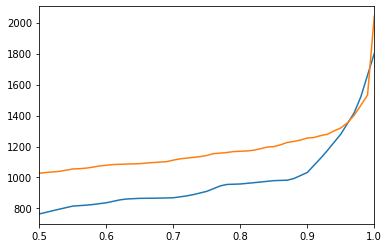

In [153]:
for index in x.index.get_level_values(0).unique():
    x.loc[index].plot()

In [154]:
target = x.reorder_levels([1,0]).sort_index()[0.94]
median = x.reorder_levels([1,0]).sort_index()[0.5]
if metric == 'Rate':
    basis = 'Net Quantity Produced'
    total_kg = annual_operating.loc[line][basis]
    additional_days_production = (total_kg / median / 24) - (total_kg / target / 24)
if metric == 'Yield':
    basis = 'Run Time'
    total_kg = annual_operating.loc[line][basis]
    additional_days_production = (total_kg / 24) - (total_kg * median / target / 24)
if metric == 'Uptime':
    additional_days_production = (target - median) /24
additional_days_production

Product group
Dec. Surfaces/others     6.807017
Shrink Sleeve           26.628520
dtype: float64

In [155]:
target = x.reorder_levels([1,0]).sort_index()[0.95]
median = x.reorder_levels([1,0]).sort_index()[0.5]
if metric == 'Rate':
    basis = 'Net Quantity Produced'
    total_kg = annual_operating.loc[line][basis]
    additional_days_production = (total_kg / median / 24) - (total_kg / target / 24)
if metric == 'Yield':
    basis = 'Run Time'
    total_kg = annual_operating.loc[line][basis]
    additional_days_production = (total_kg / 24) - (total_kg * median / target / 24)
if metric == 'Uptime':
    additional_days_production = (target - median) /24
additional_days_production

Product group
Dec. Surfaces/others     7.272248
Shrink Sleeve           28.037252
dtype: float64

In [156]:
def opportunity_conversion_days(x, annual_df, metric='Rate', basis='Net Quantity Produced', line='E26'):
    target = x.reorder_levels([1,0]).sort_index()[0.9]
    median = x.reorder_levels([1,0]).sort_index()[0.5]
    if metric == 'Rate':
        basis = 'Net Quantity Produced'
        total_kg = annual_operating.loc[line][basis]
        additional_days_production = (total_kg / median / 24) - (total_kg / target / 24)
    if metric == 'Yield':
        basis = 'Run Time'
        total_kg = annual_operating.loc[line][basis]
        additional_days_production = (total_kg / 24) - (total_kg * median / target / 24)
    if metric == 'Uptime':
        additional_days_production = (target - median) /24
    return additional_days_production

# consolidate lines compute

In [186]:
opp = pd.read_csv('data/opportunity.csv', index_col=[0,1,2,3])
opportunity = pd.read_csv('data/days.csv', index_col=[0,1,2,3])
annual_operating = pd.read_csv('data/annual.csv', index_col=[0,1])
stats = pd.read_csv('data/scores.csv')
quantiles = np.arange(50,96,1)
quantiles = quantiles*.01
quantiles = np.round(quantiles, decimals=2)
dataset = opp.sort_index()
lines = opp.index.get_level_values(1).unique()
asset_metrics = ['Yield', 'Rate', 'Uptime']
groupby = ['Line', 'Product group']
oee = pd.read_csv('data/oee.csv', index_col=0)
oee['From Date/Time'] = pd.to_datetime(oee["From Date/Time"])
oee['To Date/Time'] = pd.to_datetime(oee["To Date/Time"])
oee["Run Time"] = pd.to_timedelta(oee["Run Time"])
res = oee.groupby(groupby)[asset_metrics].quantile(quantiles)

In [187]:
a = 'a'
type(a) == str()

False

In [188]:
def find_quantile(to_remove_line='E26', to_add_line='E27',
                  metrics=['Rate', 'Yield', 'Uptime'],
                  uptime=None):
    if type(to_add_line) == str:
        to_add_line = [to_add_line]
    to_remove_kg = annual_operating.loc[to_remove_line]['Quantity Good']
    to_remove_rates = res.loc[to_remove_line].unstack()['Rate']
    to_remove_yields = res.loc[to_remove_line].unstack()['Yield']
    target_days_needed = pd.DataFrame(to_remove_kg).values / to_remove_yields\
                            / to_remove_rates / 24
    target_days_needed = target_days_needed.T
    target_days_needed['Total'] = target_days_needed.sum(axis=1)

    target_data = opportunity.loc['Additional Days'].loc[to_add_line].unstack()\
                    [metrics].sum(axis=1)
    target = pd.DataFrame(target_data).unstack().T.loc[0]

    if uptime != None:
        target[to_add_line] = target[to_add_line] + uptime

    final = pd.merge(target_days_needed, target, left_index=True, right_index=True)
    quantile = (abs(final[to_add_line].sum(axis=1) - final['Total'])).idxmin()
    return quantile, final.iloc[:-1]

def make_consolidate_plot(remove='E26', add='E27',
                          metrics=['Rate', 'Yield', 'Uptime'],
                          uptime=None):
    quantile, final = find_quantile(remove, add, metrics, uptime)
    fig = go.Figure(data=[
    go.Bar(name='Days Available', x=final.index, y=final['Days']),
    go.Bar(name='Days Needed', x=final.index, y=final['Total'])
    ])
    if uptime != None:
        title = "Quantile-Performance Target: {} + {} Uptime Days"\
            .format(quantile, uptime)
    else:
        title = "Quantile-Performance Target: {}".format(quantile)
    # Change the bar mode
    fig.update_layout(barmode='group',
                  yaxis=dict(title="Days"),
                   xaxis=dict(title="Quantile"))
    fig.update_layout({
                "plot_bgcolor": "#F9F9F9",
                "paper_bgcolor": "#F9F9F9",
                "title": title,
                "margin": dict(
                       l=0,
                       r=0,
                       b=0,
                       t=30,
                       pad=4
   ),
    })
    return fig

In [189]:
a, b = find_quantile()
a

0.95

In [190]:
to_remove_line='E26'
to_add_line='E27'
metrics=['Rate', 'Yield', 'Uptime']
uptime=None

if type(to_add_line) == str:
    to_add_line = [to_add_line]

to_remove_kg = annual_operating.loc[to_remove_line]['Quantity Good']
to_remove_rates = res.loc[to_remove_line].unstack()['Rate']
to_remove_yields = res.loc[to_remove_line].unstack()['Yield']
target_days_needed = pd.DataFrame(to_remove_kg).values / to_remove_yields\
                        / to_remove_rates / 24
target_days_needed = target_days_needed.T
target_days_needed['Total'] = target_days_needed.sum(axis=1)

target_data = opportunity.loc['Additional Days'].loc[to_add_line].unstack()\
                [metrics].sum(axis=1)
target = pd.DataFrame(target_data).unstack().T.loc[0]

if uptime != None:
    target[to_add_line] = target[to_add_line] + uptime

final = pd.merge(target_days_needed, target, left_index=True, right_index=True)
quantile = (abs(final[to_add_line].sum(axis=1) - final['Total'])).idxmin()
quantile

0.95

In [191]:
quantile, final = find_quantile()

In [192]:
oee = pd.read_csv('data/oee.csv', index_col=0)
oee['From Date/Time'] = pd.to_datetime(oee["From Date/Time"])
oee['To Date/Time'] = pd.to_datetime(oee["To Date/Time"])
oee["Run Time"] = pd.to_timedelta(oee["Run Time"])

In [193]:
target_rate_E27 = res.reorder_levels([0,2,1]).sort_index().loc['E27',0.9]['Rate'].values[0]
median_rate_E27 = res.reorder_levels([0,2,1]).sort_index().loc['E27',0.5]['Rate'].values[0]
total_kg_E27 = annual_operating.loc['E27', 'Shrink Sleeve']['Net Quantity Produced']
additional_days_production_E27 = (total_kg_E27 / median_rate_E27/24) - (total_kg_E27 / target_rate_E27/24)
print("Additional days available on E27 at p90 rate: {:.2f}".format(additional_days_production_E27))

Additional days available on E27 at p90 rate: 29.44


In [194]:
E27_downtime_days = oee.groupby('Line')['Uptime'].sum().sort_values()['E27']/24
print("Downtime days on E27: {:0.2f}".format(E27_downtime_days))

Downtime days on E27: 48.07


In [195]:
days_on_E27_for_E26_100_yield = oee.loc[oee["Line"] == "E26"]['Quantity Good'].sum() / target_rate_E27 / 24
days_on_E27_for_E28_100_yield = oee.loc[oee["Line"] == "E28"]['Quantity Good'].sum() / target_rate_E27 / 24
print("days needed on E27 to produce E26 product: {:.2f}".format(days_on_E27_for_E26_100_yield))
print("days needed on E27 to produce E28 product: {:.2f}".format(days_on_E27_for_E28_100_yield))

days needed on E27 to produce E26 product: 68.42
days needed on E27 to produce E28 product: 37.57


In [196]:
to_remove_line = 'E26'
to_add_line = 'E27'
quantile = 0.99
def determine_consolidation(to_remove_line='E26', to_add_line='E27', quantile=0.99):
    target_data = opportunity.reorder_levels([0,2,1,3]).sort_index().loc['Additional Days', quantile, to_add_line]
    target_rate = res.reorder_levels([0,2,1]).sort_index().loc[to_add_line,quantile]['Rate']
    target_days_needed = oee.loc[oee["Line"] == to_remove_line]['Quantity Good'].sum() / target_rate / 24
    return target_days_needed.sum(), target_data.sum().sum()

In [197]:
to_remove_kg

Product group
Dec. Surfaces/others     185956.944
Shrink Sleeve           2721629.545
Name: Quantity Good, dtype: float64

In [198]:
to_remove_rates

0.50         0.51         0.52         0.53  \
Product group                                                              
Dec. Surfaces/others   764.765369   775.173062   785.580755   795.728929   
Shrink Sleeve         1027.491544  1032.541374  1036.008832  1039.509571   

                             0.54         0.55         0.56         0.57  \
Product group                                                              
Dec. Surfaces/others   805.617582   815.506236   818.411408   821.316579   
Shrink Sleeve         1047.392477  1055.123542  1056.853314  1060.573844   

                             0.58         0.59         0.60         0.61  \
Product group                                                              
Dec. Surfaces/others   825.573263   831.181460   836.789656   846.064259   
Shrink Sleeve         1067.047746  1074.676678  1079.255345  1083.516488   

                             0.62         0.63         0.64         0.65  \
Product group                                                              
Dec. Surfaces/others   855.338861   861.040738   863.169891   865.299044   
Shrink Sleeve         1084.925564  1086.751105  1087.764937  1089.360056   

                             0.66         0.67         0.68         0.69  \
Product group                                                              
Dec. Surfaces/others   865.725418   866.151791   866.902654   867.978006   
Shrink Sleeve         1093.590977  1096.562819  1099.582823  1102.298540   

                             0.70         0.71         0.72         0.73  \
Product group                                                              
Dec. Surfaces/others   869.053357   875.148202   881.243047   889.557599   
Shrink Sleeve         1112.263652  1120.358033  1125.175911  1129.968484   

                             0.74         0.75         0.76         0.77  \
Product group                                                              
Dec. Surfaces/others   900.091858   910.626118   928.117953   945.609787   
Shrink Sleeve         1135.128091  1142.141847  1154.426229  1157.086312   

                             0.78         0.79        0.80         0.81  \
Product group                                                             
Dec. Surfaces/others   955.086845   956.549128   958.01141   962.164477   
Shrink Sleeve         1161.463947  1167.367893  1169.47108  1171.404506   

                             0.82         0.83         0.84         0.85  \
Product group                                                              
Dec. Surfaces/others   966.317543   970.628863   975.098435   979.568008   
Shrink Sleeve         1176.207688  1185.546302  1196.362129  1199.240749   

                             0.86         0.87         0.88         0.89  \
Product group                                                              
Dec. Surfaces/others   981.089664   982.611320   993.185465  1012.812098   
Shrink Sleeve         1211.118502  1226.173129  1232.662330  1241.848069   

                             0.90         0.91         0.92         0.93  \
Product group                                                              
Dec. Surfaces/others  1032.438731  1078.528672  1124.618612  1174.095505   
Shrink Sleeve         1254.999206  1258.293226  1270.539321  1279.033605   

                             0.94         0.95  
Product group                                   
Dec. Surfaces/others  1226.959350  1279.823196  
Shrink Sleeve         1301.214505  1319.815128

In [199]:
to_remove_kg.values

array([ 185956.944, 2721629.545])

In [200]:
to_remove_yields

0.50      0.51      0.52      0.53      0.54  \
Product group                                                            
Dec. Surfaces/others  0.593545  0.597491  0.601437  0.607956  0.617047   
Shrink Sleeve         0.921148  0.923112  0.924070  0.925996  0.929623   

                          0.55      0.56      0.57      0.58      0.59  \
Product group                                                            
Dec. Surfaces/others  0.626137  0.629368  0.632598  0.637144  0.643005   
Shrink Sleeve         0.935138  0.939728  0.940231  0.942892  0.945478   

                          0.60      0.61      0.62      0.63      0.64  \
Product group                                                            
Dec. Surfaces/others  0.648866  0.655331  0.661795  0.666929  0.670732   
Shrink Sleeve         0.947486  0.950872  0.952279  0.954284  0.955672   

                          0.65      0.66      0.67      0.68      0.69  \
Product group                                                            
Dec. Surfaces/others  0.674536  0.675502  0.676468  0.679823  0.685566   
Shrink Sleeve         0.957896  0.961515  0.965500  0.966561  0.967204   

                          0.70      0.71      0.72      0.73      0.74  \
Product group                                                            
Dec. Surfaces/others  0.691309  0.693700  0.696090  0.702598  0.713225   
Shrink Sleeve         0.967694  0.971714  0.974036  0.976615  0.980826   

                          0.75      0.76      0.77      0.78      0.79  \
Product group                                                            
Dec. Surfaces/others  0.723852  0.730209  0.736566  0.746773  0.760829   
Shrink Sleeve         0.982165  0.983824  0.986600  0.991066  0.994349   

                          0.80      0.81      0.82      0.83     0.84  \
Product group                                                           
Dec. Surfaces/others  0.774885  0.777695  0.780506  0.784997  0.79117   
Shrink Sleeve         1.000000  1.000000  1.000000  1.000000  1.00000   

                          0.85      0.86      0.87      0.88      0.89  \
Product group                                                            
Dec. Surfaces/others  0.797343  0.801378  0.805412  0.807969  0.809048   
Shrink Sleeve         1.000000  1.000000  1.000000  1.000000  1.000000   

                          0.90      0.91      0.92      0.93      0.94  \
Product group                                                            
Dec. Surfaces/others  0.810127  0.813954  0.817782  0.826774  0.840931   
Shrink Sleeve         1.000000  1.000000  1.000000  1.000000  1.000000   

                          0.95  
Product group                   
Dec. Surfaces/others  0.855087  
Shrink Sleeve         1.000000

In [201]:
to_remove_line = 'E26'
to_add_line = 'E27'

to_remove_kg = annual_operating.loc[to_remove_line]['Net Quantity Produced']
to_remove_yields = res.loc[to_remove_line].unstack()['Yield']

to_remove_rates = res.loc[to_remove_line].unstack()['Rate']

target_days_needed = pd.DataFrame(to_remove_kg).values / to_remove_yields / to_remove_rates / 24
target_days_needed = target_days_needed.T
target_days_needed['Total'] = target_days_needed.sum(axis=1)

target_data = opportunity.loc['Additional Days', to_add_line].unstack().sum(axis=1)
target = pd.DataFrame(target_data).T
target.index=['Days']
target = target.T

final = pd.merge(target_days_needed, target, left_index=True, right_index=True)
quantile = (abs(final['Days'] - final['Total'])).idxmin()
print(quantile)

0.95


In [202]:
to_remove_line = 'E26'
to_add_line = 'E28'
metrics=['Rate', 'Yield', 'Uptime']
target_data = opportunity.loc['Additional Days', to_add_line].unstack().sum(axis=1)
target_rate = res.loc[to_add_line].unstack().sum()['Rate']
target_days_needed = oee.loc[oee["Line"] == to_remove_line]['Quantity Good'].sum() / target_rate / 24

In [203]:
prod_good = oee.loc[oee["From Date/Time"].dt.year == 2019].groupby(groupby)['Quantity Good'].sum()
prod = oee.loc[oee["From Date/Time"].dt.year == 2019].groupby(groupby)['Net Quantity Produced'].sum()
time = oee.loc[oee["From Date/Time"].dt.year == 2019].groupby(groupby)['Run Time'].sum()
annual_operating = pd.merge(prod, time, left_index=True, right_index=True)
annual_operating = pd.merge(annual_operating, prod_good, left_index=True, right_index=True)
annual_operating['Run Time'] = annual_operating['Run Time'].dt.total_seconds()/60/60

In [204]:
# annual_operating.to_csv('../../../dashboards/line_consolidation/data/annual.csv')

In [205]:
oee['From Date/Time'] = pd.to_datetime(oee["From Date/Time"])
oee['To Date/Time'] = pd.to_datetime(oee["To Date/Time"])
oee["Run Time"] = pd.to_timedelta(oee["Run Time"])

quantiles = np.arange(50,101,1)
quantiles = quantiles*.01
quantiles = np.round(quantiles, decimals=2)
asset_metrics = ['Yield', 'Rate', 'Uptime']
groupby = ['Line', 'Product group']
res = oee.groupby(groupby)[asset_metrics].quantile(quantiles)#.unstack(level=1)

In [206]:
def find_quantile(to_remove_line='E26', to_add_line='E27', 
                  metrics=['Rate', 'Yield', 'Uptime'],
                  uptime=None):
    to_remove_kg = annual_operating.loc[to_remove_line]['Quantity Good']
    to_remove_rates = res.loc[to_remove_line].unstack()['Rate']
    to_remove_yields = res.loc[to_remove_line].unstack()['Yield']
    target_days_needed = pd.DataFrame(to_remove_kg).values / to_remove_yields / to_remove_rates / 24
    target_days_needed = target_days_needed.T
    target_days_needed['Total'] = target_days_needed.sum(axis=1)

    target_data = opportunity.loc['Additional Days', to_add_line].unstack()[metrics].sum(axis=1)
    target = pd.DataFrame(target_data).T
    target.index=['Days']
    target = target.T
    if uptime != None:
        target['Days'] = target['Days'] + uptime

    final = pd.merge(target_days_needed, target, left_index=True, right_index=True)
    quantile = (abs(final['Days'] - final['Total'])).idxmin()
    return quantile, final.iloc[:-1]

In [207]:
opportunity

Rate      Yield  \
Basis           Line      Product group                                 
Additional Days E26  0.50 Dec. Surfaces/others    0.000000   0.000000   
                          Shrink Sleeve           0.000000   0.000000   
                     0.51 Dec. Surfaces/others    0.224770   0.956659   
                          Shrink Sleeve           0.619090   0.433102   
                     0.52 Dec. Surfaces/others    0.314963   1.114807   
...                                                    ...        ...   
                K40  1.00 Dec. Surfaces/others  173.146636  15.810691   
                          Roll Sleeve             0.039294   0.000000   
                          Shrink Sleeve           5.888814   2.349726   
                          Stationery              0.199387   0.084804   
                          Tape                    0.409578   0.073526   

                                                   Uptime  
Basis           Line      Product group                    
Additional Days E26  0.50 Dec. Surfaces/others   0.000000  
                          Shrink Sleeve          0.000000  
                     0.51 Dec. Surfaces/others   0.000000  
                          Shrink Sleeve          0.000000  
                     0.52 Dec. Surfaces/others   0.000000  
...                                                   ...  
                K40  1.00 Dec. Surfaces/others  10.624884  
                          Roll Sleeve            0.000000  
                          Shrink Sleeve          4.017917  
                          Stationery             9.933669  
                          Tape                   5.120035  

[1428 rows x 3 columns]

In [208]:
quantile, final = find_quantile('E26', 'E27', ['Yield', 'Rate', 'Uptime'], uptime=20)
print(quantile)
fig = go.Figure(data=[
    go.Bar(name='Days Available', x=final.index, y=final['Days']),
    go.Bar(name='Days Needed', x=final.index, y=final['Total'])
])
# Change the bar mode
fig.update_layout(barmode='group',
                  yaxis=dict(title="Days"),
                   xaxis=dict(title="Quantile"),)


0.98


With the given line performances there is an opportunity for consolidation. 'Days Needed' are computed from Rate, Yield and the total production for 'Line to Remove' in 2019. 'Days Available' is computed from rate, yield, and uptime improvements in 'Line to Overload'. A manual overide is available to remove uptime consideration. In this case, uptime can be manually inputed, with a maximum value based on the downtime days for that line in 2019. For instance, E26 can be consolidated into E27 by operating at quantile 0.99

In [209]:
determine_consolidation('E28','E27',quantile=0.99)

(31.44287126353186, 68.39196835554503)

In [210]:
line='E28'
np.round(oee.loc[oee['Line'] == line]['Uptime'].sum()/24)

172.0

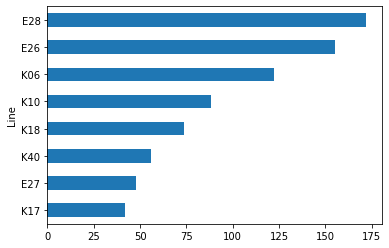

In [211]:
(oee.groupby('Line')['Uptime'].sum()/24).sort_values().plot.barh()